In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split

In [47]:
df = pd.read_csv("data/data.csv")
df.shape

(4600, 18)

There is 4600 lines and 18 columns, which means there is 4600 houses and 18 parameters in the data set

In [48]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [49]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [50]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")
df.dtypes

date              string
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            string
city              string
statezip          string
country           string
dtype: object

In [51]:
df.city.value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Newcastle                33
Bothell                  33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

As the dataframe extends mostly to the Seatle city, we're gonna to study only this area since others cities don't have much data to analyze

In [52]:
df_seattle = df[df.city == "Seattle"]
df_seattle.shape

(1573, 18)

As it can be seen, df_seattle contains only the matched data for seattle city

In [53]:
df_seattle = df_seattle.drop(columns=["city", "country","statezip", "yr_renovated"])
df_seattle.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,709 W Blaine St
5,2014-05-02 00:00:00,490000.0,2.0,1.0,880,6380,1.0,0,0,3,880,0,1938,522 NE 88th St
9,2014-05-02 00:00:00,640000.0,4.0,2.0,1520,6200,1.5,0,0,3,1520,0,1945,6811 55th Ave NE
11,2014-05-02 00:00:00,1400000.0,4.0,2.5,2920,4000,1.5,0,0,5,1910,1010,1909,3838-4098 44th Ave NE
13,2014-05-02 00:00:00,365000.0,3.0,1.0,1090,6435,1.0,0,0,4,1090,0,1955,2504 SW Portland Ct


By intuition, we know that if a sqft increases the price has to increase, let's check this graphically...

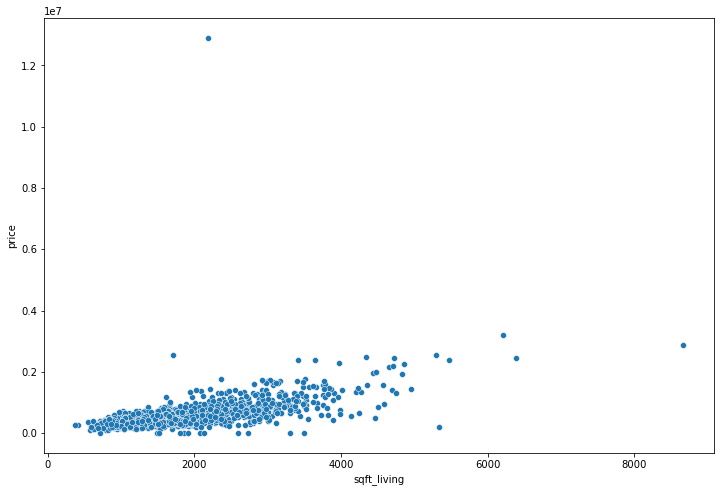

In [54]:
plt.figure(figsize=(12,8))
sb.scatterplot(x = df_seattle.sqft_living, y = df_seattle.price)
plt.show()

We can see that is a tendency of increasing the price as the sqft_living increases, but we can also see that there's some outliers, to check that better let's take the zscore of the price values and the sqft_living (zscore to identify possible outliers)

**REMOVING OUTLIERS USING Z-SCORE**

In [55]:
z_threshold = 3

z_price = np.abs(stats.zscore(df_seattle["price"]))
a_out_price = np.where(z_price > z_threshold)
df_seattle_clean = df_seattle.drop(df_seattle.index[a_out_price[0]])

z_sqftliving = np.abs(stats.zscore(df_seattle_clean["sqft_living"]))
a_out_sqftliving = np.where(z_sqftliving > z_threshold)
df_seattle_clean = df_seattle_clean.drop(df_seattle_clean.index[a_out_sqftliving[0]])

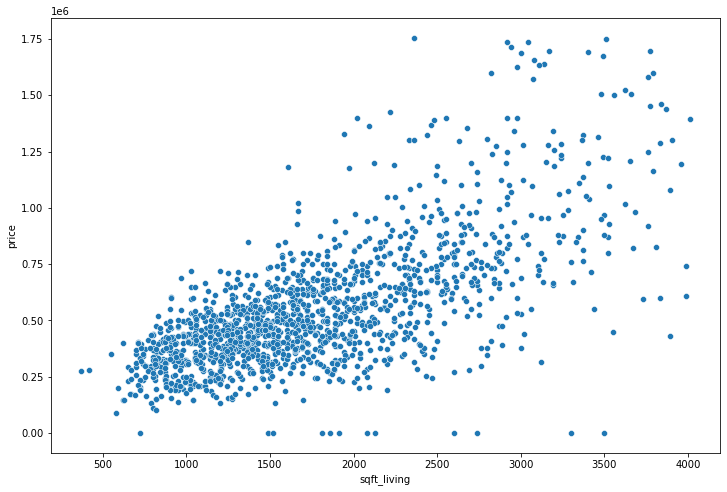

In [56]:
plt.figure(figsize=(12,8))
sb.scatterplot(x = df_seattle_clean.sqft_living, y = df_seattle_clean.price)
plt.show()

As we can see graphically we removed some data that was irregular and now it's more likely to have a good model fitting

We can also check the pearson correlation between the original seattle dataset to evaluate if our intuition is rigth, and also check if there is some other variables that has strong correlation

**PEARSON CORRELATION**

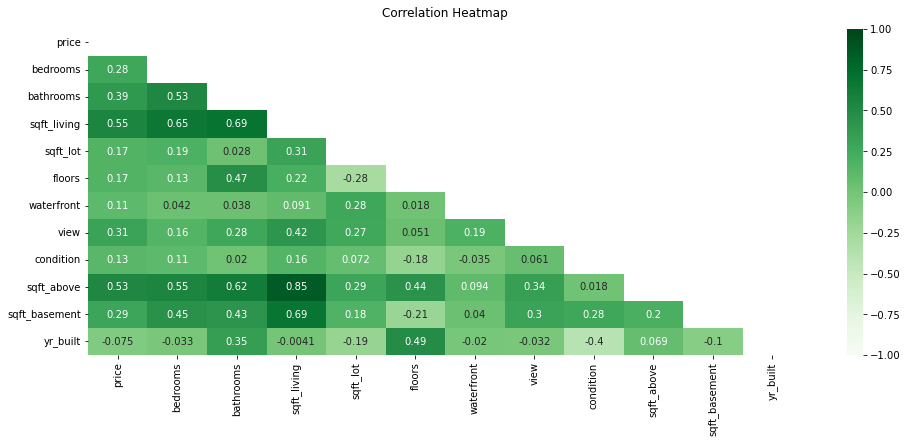

In [57]:
df_columns = df_seattle.columns.values
corr = df_seattle.corr()

mask = np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(16, 6))
heatmap = sb.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap="Greens", mask=mask)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

As we can see, the strongest correlation thinking in price is the sqft_living (0,55) and sqft_above (0,53), we can also check there's more correlation between other variables, such as sqft_above x sqft_living (0,85) and bathrooms x sqft_living, but for the purpouse of this dataset, that consists in predicting the price it's reasonable to look only to the correlations that are related to the price variable

We can also check the correlation after cleaning the sqft_living dataset as done previously

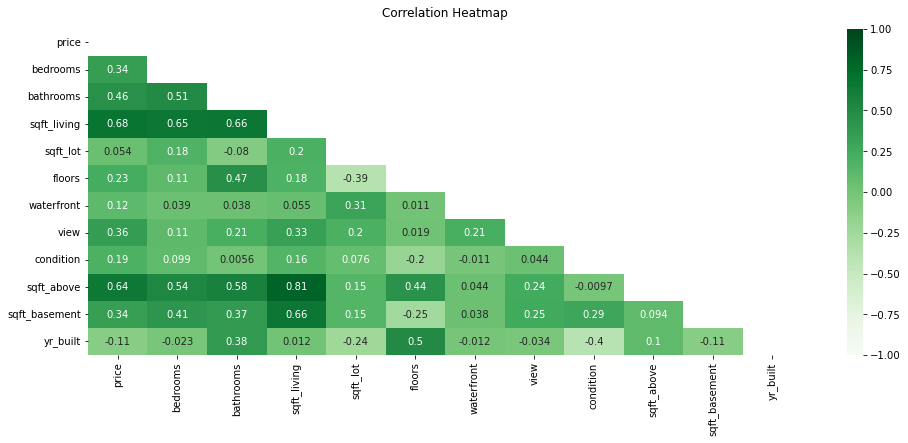

In [58]:
df_columns = df_seattle_clean.columns.values
corr = df_seattle_clean.corr()

maks = np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(16, 6))
heatmap = sb.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap="Greens", mask=mask)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

As expected, the correlation tends to increase since we discart outliers on our dataset, we could check outliers in others variables like bedrooms and bathrooms, but to simplify the problem, since we have few data and it seems to be harmful to discart more from the dataset only to increase few on the correlation, it's better to focus on the price x sqft_living to make a model

**DATASET SPLIT**

With the features defined as sqft_living to predict the price, we can split the dataset into training, testing and cross-validation. This is necessary to evaluate the accuracy of the model and see if it overfits, underfits or is trusty.

It is a good practice to split 60% into training, 20% in testing and 20% in validation, as it is bellow

In [59]:
X = df_seattle_clean.sqft_living
Y = df_seattle_clean.price

In [60]:
X_train, X_, Y_train, Y_ = train_test_split(X,Y,test_size=0.40, random_state=1)
X_cv, X_test, Y_cv, Y_test = train_test_split(X_,Y_,test_size=0.50, random_state=1)

In [61]:
print("X.shape", X.shape, "Y.shape", Y.shape)
print("X_train.shape", X_train.shape, "Y_train.shape", Y_train.shape)
print("X_cv.shape", X_cv.shape, "Y_cv.shape", Y_cv.shape)
print("X_test.shape", X_test.shape, "Y_test.shape", Y_test.shape)

X.shape (1541,) Y.shape (1541,)
X_train.shape (924,) Y_train.shape (924,)
X_cv.shape (308,) Y_cv.shape (308,)
X_test.shape (309,) Y_test.shape (309,)


The training set has the propouse to tune the parameters in training or fitting.
The test set has the propouse to test the model after tuning to gauge performance on new data
The cross-validation set has the propouse to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.